@JK: Here should be the Notebook for evaluating custom optimizers


In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import yaml

from src.environments import ea
from src.environments.ea_auxiliary import make_eval_env

<div style="text-align: center; width:100%;">
    <h2>The Power of Standard Optimizers </h1>
</div>

The Nelder-Mead optimizer is a widely used, derivative-free optimization algorithm, well-suited for solving complex problems where gradients are difficult or expensive to compute. It relies on a simplex of n + 1 points to explore the search space and iteratively converges towards an optimal solution. In the context of the ARES-AE beam control problem, the Nelder-Mead optimizer is applied to adjust the magnet settings, effectively steering the beam to desired positions and focusing it to the required size. Its robustness in handling non-linear, noisy objective functions makes it an effective method for this type of application, where precise control over the beam's trajectory is crucial.

However, to leverage the power of this optimizer, we first need to establish a well-defined environment that accurately models the problem at hand. The environment plays a crucial role in providing the feedback necessary for optimization, and in our case, it serves as the foundation for beam focusing and positioning at the ARES accelerator.

Before diving into control algorithms, it's important to set up the simulation, define the state and observation space, and ensure the environment provides meaningful feedback to an agent or controller. In our setup, the environment models the behavior of the electron beam as it passes through magnets and interacts with the diagnostic screen. By initializing the environment, we ensure that:

- We define a clear optimization goal – aligning the observed beam parameters with the target beam.

- We establish a reproducible testbed – allowing us to evaluate different control methods systematically.


<h3 style="color:#038aa1;">Set a target beam you want to achieve</h3>
<p style="color:#038aa1;"> $\implies$ Let's define the desired position $(\mu_x, \mu_y)$ and size $(\sigma_x, \sigma_y)$ of the beam on the screen</p>
<p style="color:#038aa1;"> $\implies$ Modify the <code>target_beam</code> parameters list below, where the order of the arguments is $[\mu_x,\sigma_x,\mu_y,\sigma_y]$</p>
<p style="color:#038aa1;"> $\implies$  Consider the screen dimensions ($\pm$ 2e-3 m) when setting the target values</p>
<p style="color:#038aa1;"> $\implies$ The target beam will be visually represented as a blue circle on the screen</p>


In [2]:
# Set EA configuration parameters path
config_path = Path("config/ea_eval_config.yaml")

# Load EA configuration parameters
with config_path.open("r", encoding="utf-8") as file:
    config = yaml.safe_load(file)

# Create a EA environment
env = make_eval_env(config)

FileNotFoundError: [Errno 2] No such file or directory: 'config/ea_eval_config.yaml'

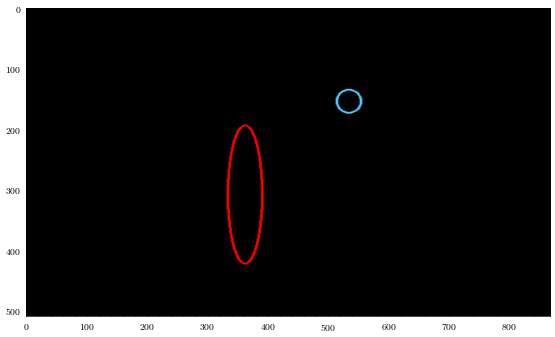

In [ ]:
# Specificy target beam parameters, adjust as desired
target_beam = np.array([1e-3, 2e-4, 1e-3, 2e-4])

env.unwrapped.target_beam_mode = target_beam
env.reset()  # Render one simulation frame

# Visually inspect beam position
plt.figure(figsize=(7, 4))
plt.imshow(env.render())  # Plot the screen image
# Let's improve the rendering to be the same as for RL4AA23